### In Class Activity A
Load the blue bikes data into a dataframe and answer the following questions:

- How many bike trips are in the dataset, in total?
- What period of time does the data represent?
- How many different stations did users start at?
- What was the average lattitude / longitude for a starting station?
- How many bike trips are taken on a monday (dayofweek=0) within the dataset?
    - hint: grab just the monday trips via boolean indexing

In [ ]:
import pandas as pd

df_bikes = pd.read_csv('201909-bluebike-clean.zip')

In [28]:
# 361143
df_bikes.shape;

In [9]:
# September 2019
df_bikes["starttime"].unique();

In [8]:
# 328 different stations
len(df_bikes["start station name"].unique());

In [7]:
# average latitude = 42.35702935987539
df_bikes["start station latitude"].mean()

# average longitude = -71.08852011303388
df_bikes["start station longitude"].mean();

In [30]:
# 57932 = no. bike trips taken on a monday
df_bikes[(df_bikes["dayofweek"] == 0)].shape;

## In Class Activity B
Build a 1 x 3 subplot array of histograms showing the distance travelled from the following starting stations:
- `Commonwealth Ave at Agganis Way`
- `Kendall T`
- `Ring Rd`

for each plot:
- add title
- label axes

**tip:** build just one of the figures and don't worry about subplot initially, once you've got that settled it'll be easier to build the loop

see what issues come up for you ... any suggestions on displaying this data?  does this graph "lie" to you in any way?

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

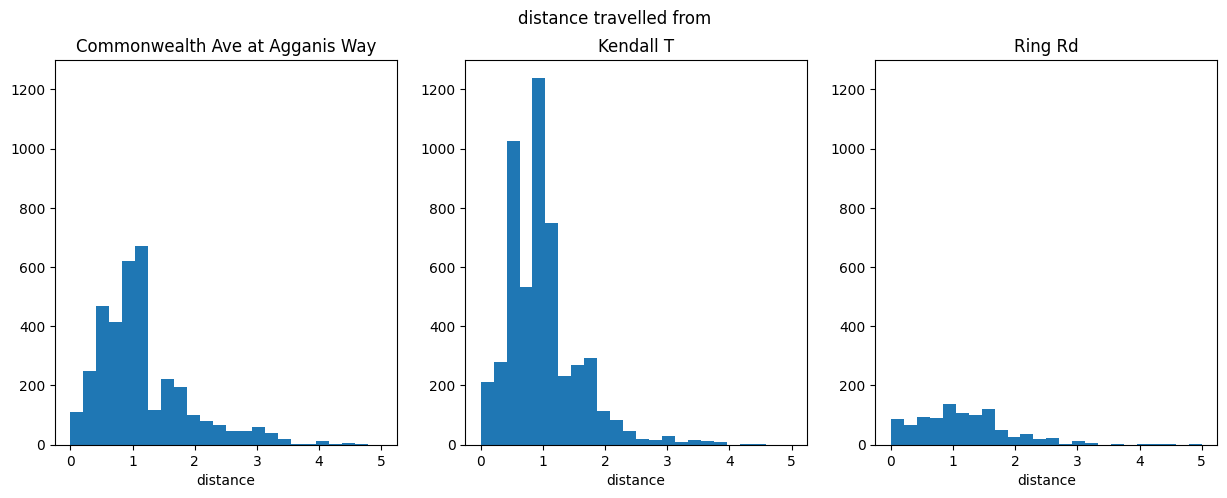

In [44]:
stations = ["Commonwealth Ave at Agganis Way", "Kendall T", "Ring Rd"]
bins = np.linspace(0, 5, 25)

plt.figure(figsize = (15, 5))
plt.suptitle("distance travelled from ")
for i in range(len(stations)):
    # get station
    start = stations[i]
    
    # retrieve relevant variables
    extract = df_bikes["start station name"] == start
    df_bikes_start = df_bikes.loc[extract, :]
    
    # plot / axis / title
    plt.subplot(1, 3, i + 1)
    plt.hist(df_bikes_start["distance"], bins)
    
    plt.gca().title.set_text(start)
    plt.xlabel("distance")
    plt.ylim(0, 1300)

## In class activity C (tight on time, but hopefully!)
Use any graphing method you'd like to answer:

1. Do folks travelling longer distances go faster on `2019-09-30`?
2. (++) Does the relationship hold up on every day of the week? 
    - (subplots)

You have `tripduration` and `distance` ... you can compute `speed` as:
```python
df_bikes['speed'] = df_bikes['distance'] / df_bikes['tripduration']`
```


Text(0.5, 0.98, '2019-09-13')

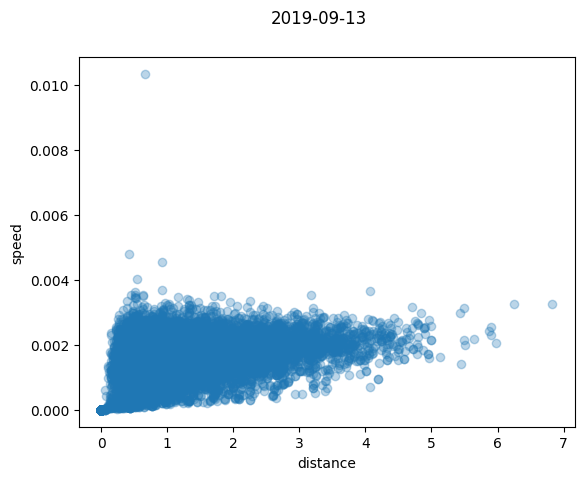

In [48]:
day = "2019-09-13"

# compute speed
df_bikes["speed"] = df_bikes["distance"] / df_bikes["tripduration"]

# extract that day's trips
daily = df_bikes["startday"] == day
df_bikes_day = df_bikes.loc[daily, :]

# plot
x = "distance"
y = "speed"

plt.scatter(df_bikes_day[x], df_bikes_day[y], alpha = 0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.suptitle(day)